Autoencoder


In [104]:
from torch import nn,rand_like

class Autoencoder(nn.Module):
        def __init__(self, input_dim,latent_dim=2):
            super().__init__()
            self.encoder = nn.Sequential(
                nn.Linear(input_dim,128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Linear(128,64),
                nn.BatchNorm1d(64),
                nn.ReLU(),
                nn.Linear(64,latent_dim),
                nn.BatchNorm1d(latent_dim),
                nn.ReLU()
            )
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim,64),
                nn.BatchNorm1d(64),
                nn.ReLU(),
                nn.Linear(64,128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Linear(128,input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            )
           
        def forward(self,x,noise_rate = 0.3):
            x = x + rand_like(x)* noise_rate
            x = self.encoder(x)
            x = self.decoder(x)
            return x
            



Dataset

In [105]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

train_dataset = MNIST(root='MNIST',transform = transforms.ToTensor())

batch_size_ = 100

train_loader = DataLoader(train_dataset,
                          batch_size= batch_size_,
                          shuffle = True)

Learning loop


In [106]:
from torch.nn.functional import mse_loss
from torch.optim import Adam

model = Autoencoder(784)
opt = Adam(model.parameters(), lr = 0.01)

n_epochs = 3
for epoch in range(n_epochs):
    for image,label in train_loader:
        opt.zero_grad() 
        image = image.reshape(-1,28*28)
        print(image.shape)
        y_pred = model(image)
        loss = mse_loss(y_pred,image)
        print(f'Epoch №{epoch + 1} Loss: ',loss)
        loss.backward()
        opt.step()

torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.5132, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.3185, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.2073, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.1819, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.1580, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.1392, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.1365, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.1194, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.1171, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.1086, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.0988, grad_fn=<MseLossBackward0>)
torch.Size([100, 784])
Epoch №1 Loss:  tensor(0.0983, grad_fn=<MseLossBackward0>)
torch.Size([100,

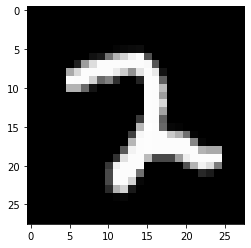

In [107]:
import matplotlib.pyplot as plt

for image , i in train_loader: 
    image = image.reshape(-1,28*28)
    y_pred = model(image)
    y_pred = y_pred.reshape(-1,28,28)
    #plt.imshow(y_pred[0].detach().numpy(),cmap = 'gray')
    image = image.reshape(-1,28,28)
    plt.imshow(image[0],cmap = 'gray')
    break


torch.Size([28, 28])


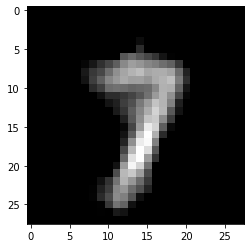

In [108]:
for image , i in train_loader: 
    image = image.reshape(-1,28*28)
    y_pred = model(image)
    y_pred = y_pred.reshape(-1,28,28)
    print(y_pred[0].shape)
    plt.imshow(y_pred[0].detach().numpy(),cmap = 'gray')
    break